In [216]:
%pip install -r requirements.txt

  Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl.metadata (15 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ----------------------- ---------------- 6.6/11.1 MB 33.5 MB/s eta 0:00:01
   ---------------------------------------  11.0/11.1 MB 27.5 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 24.8 MB/s eta 0:00:00
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ---------------------------------------- 0.0/40.9 MB ? eta -:--:--
   -- ------------------------------------- 2.9/40.9 MB 12.0 MB/s eta 0:00:04
   ----- ---------------------------------- 6.0/40.9 MB 10.3 MB/s eta 0:00:04
   ------- -------------------------------- 8.1/40.9 MB 9.7 MB/s eta 0:00:04
   --------- ------------------------------ 10.0/40.9 MB 9.4 MB/s eta 0:00:04
   ------------ --------------------------- 12.3/40.


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [268]:
# dataset link: https://www.kaggle.com/sdolezel/black-friday?select=train.csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import matplotlib
%matplotlib inline

### Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [269]:
df_train = pd.read_csv('train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [270]:
df_test = pd.read_csv('test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [271]:
# Append test and train data using concat
df = pd.concat([df_train, df_test], ignore_index=True)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


In [273]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [274]:
df.size

9404004

In [275]:
df.shape

(783667, 12)

In [276]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [279]:
# Drop product_id and user_id columns as they would not useful for our analysis
df.drop(['Product_ID', 'User_ID'], axis=1, inplace=True)


In [280]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [281]:
# Encode categorical variable, Gender
df['Gender'] = df['Gender'].map({'F': 0, 'M': 1})
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [282]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [283]:
# Encode categorical variable, Age
df['Age'] = df['Age'].map({'0-17': 1, '18-25': 2, '26-35': 3, '36-45': 4, '46-50': 5, '51-55': 6, '55+': 7})
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [284]:
# Encode categorical variable, City_Category
# df['City_Category'] = df['City_Category'].map({'A': 0, 'B': 1, 'C': 2})
# If there are n categories, we can use n-1 dummy variables to represent them. This is one hot encoding. 
df_city = pd.get_dummies(df['City_Category'], drop_first=True)
df_city.head()

,B,C
0,False,False
1,False,False
2,False,False
3,False,False
4,False,True


In [285]:
df = pd.concat([df, df_city], axis=1)
df.drop(['City_Category'], axis=1, inplace=True)
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,NaN,NaN,8370.0,False,False
1,0,1,10,2,0,1,6.0,14.0,15200.0,False,False
2,0,1,10,2,0,12,NaN,NaN,1422.0,False,False
3,0,1,10,2,0,12,14.0,NaN,1057.0,False,False
4,1,7,16,4+,0,8,NaN,NaN,7969.0,False,True


In [286]:
# Check for missing values again
df.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

### Observation
1. Purchase has null values because it has test data also.
2. We should focus on Product_Category_2 and Product_Category_3

In [287]:
# Focus on the Product_Category_2 and Product_Category_3 columns
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [288]:
df['Product_Category_2'].value_counts().sort_index()

Product_Category_2
2.0     70498
3.0      4123
4.0     36705
5.0     37165
6.0     23575
7.0       854
8.0     91317
9.0      8177
10.0     4420
11.0    20230
12.0     7801
13.0    15054
14.0    78834
15.0    54114
16.0    61687
17.0    19104
18.0     4027
Name: count, dtype: int64

In [289]:
# Replace missing values with mode
df['Product_Category_2'].mode()

0    8.0
Name: Product_Category_2, dtype: float64

In [290]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])
df['Product_Category_2'].unique()

array([ 8.,  6., 14.,  2., 15., 16., 11.,  5.,  3.,  4., 12.,  9., 10.,
       17., 13.,  7., 18.])

In [291]:
df['Product_Category_2'].isnull().sum()

np.int64(0)

In [292]:
# Do same for Product_Category_3
df['Product_Category_3'].mode()

0    16.0
Name: Product_Category_3, dtype: float64

In [293]:
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])
df['Product_Category_3'].isnull().sum()

np.int64(0)

In [294]:
# Now work on Stay_In_Current_City_Years
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [295]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+', '')
df['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int64  
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   Stay_In_Current_City_Years  783667 non-null  object 
 4   Marital_Status              783667 non-null  int64  
 5   Product_Category_1          783667 non-null  int64  
 6   Product_Category_2          783667 non-null  float64
 7   Product_Category_3          783667 non-null  float64
 8   Purchase                    550068 non-null  float64
 9   B                           783667 non-null  bool   
 10  C                           783667 non-null  bool   
dtypes: bool(2), float64(3), int64(5), object(1)
memory usage: 55.3+ MB


### Observation
1. Stay_In_Current_City_Years is still an object so we need to convert it into int.

In [297]:
# Convert Stay_In_Current_City_Years to int
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int64  
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   Stay_In_Current_City_Years  783667 non-null  int64  
 4   Marital_Status              783667 non-null  int64  
 5   Product_Category_1          783667 non-null  int64  
 6   Product_Category_2          783667 non-null  float64
 7   Product_Category_3          783667 non-null  float64
 8   Purchase                    550068 non-null  float64
 9   B                           783667 non-null  bool   
 10  C                           783667 non-null  bool   
dtypes: bool(2), float64(3), int64(6)
memory usage: 55.3 MB


In [298]:
# Convert B and C to 0 and 1 and of type int
df['B'] = df['B'].map({False: 0, True: 1})
df['C'] = df['C'].map({False: 0, True: 1})
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [299]:
df['B'] = df['B'].astype(int)
df['C'] = df['C'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int64  
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   Stay_In_Current_City_Years  783667 non-null  int64  
 4   Marital_Status              783667 non-null  int64  
 5   Product_Category_1          783667 non-null  int64  
 6   Product_Category_2          783667 non-null  float64
 7   Product_Category_3          783667 non-null  float64
 8   Purchase                    550068 non-null  float64
 9   B                           783667 non-null  int64  
 10  C                           783667 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 65.8 MB


<Axes: xlabel='Age', ylabel='Purchase'>

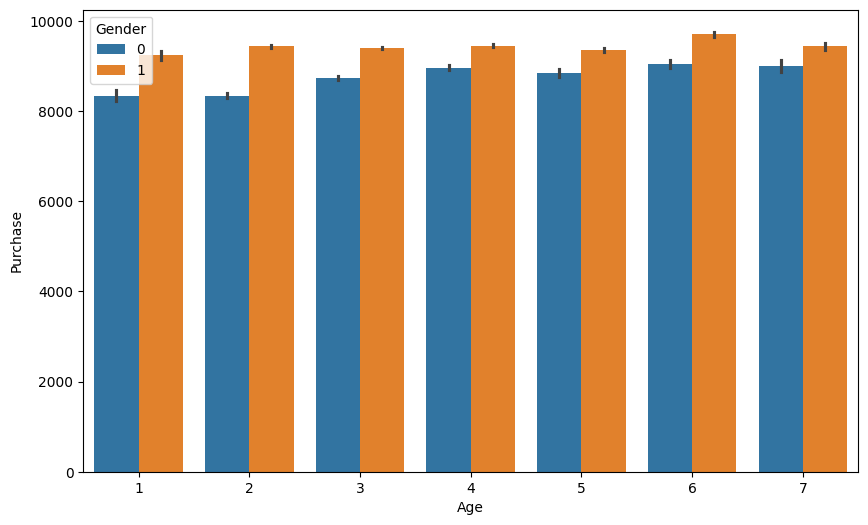

In [300]:
# Visualize the Age vs Purchase
plt.figure(figsize=(10, 6))
sns.barplot(x='Age', y='Purchase', data=df, hue='Gender')

### Observation
1. Females purchase more than Males.

<Axes: xlabel='Occupation', ylabel='Purchase'>

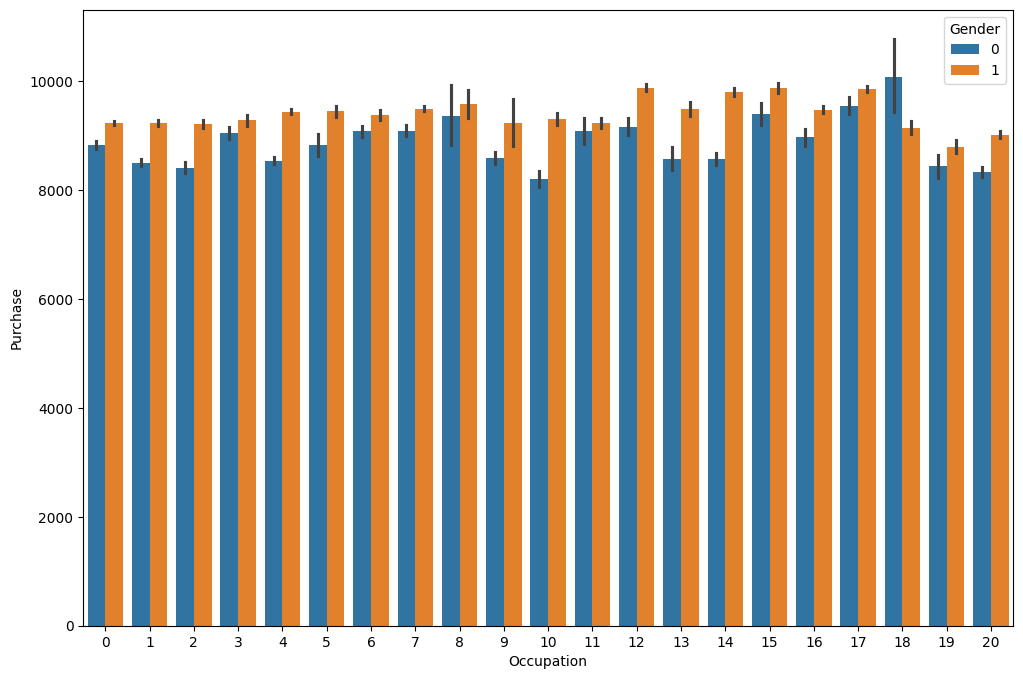

In [301]:
# Visualize the Purchase vs Occupation
plt.figure(figsize=(12, 8))
sns.barplot(x='Occupation', y='Purchase', data=df,  hue='Gender')

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

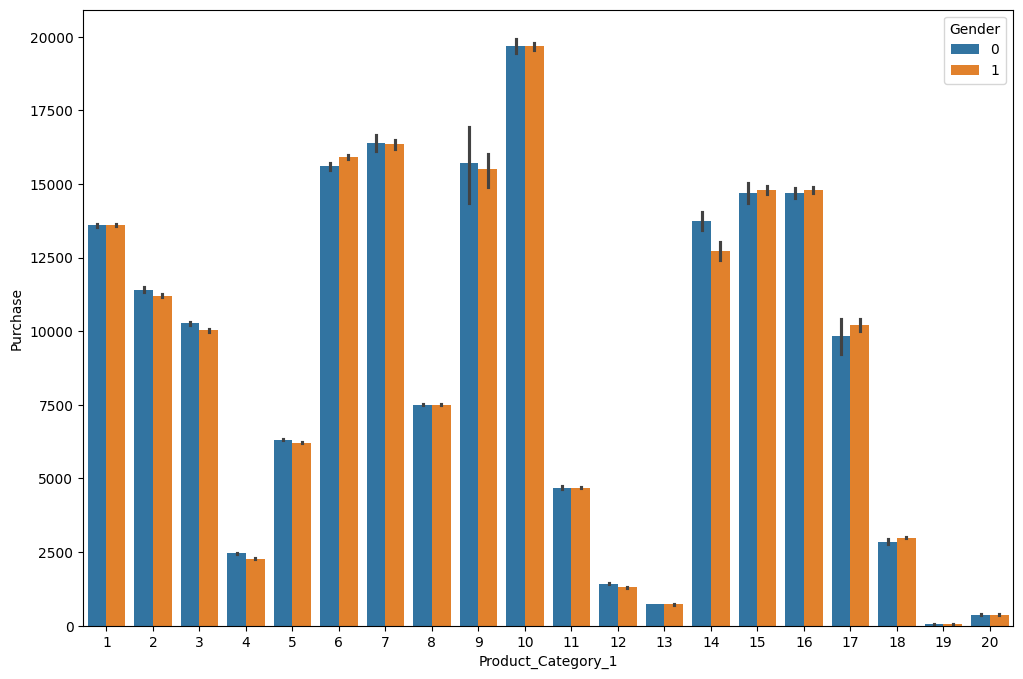

In [302]:
# Visualize the Product_Category_1 vs Purchase
plt.figure(figsize=(12, 8))
sns.barplot(x='Product_Category_1', y='Purchase', data=df,  hue='Gender')

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

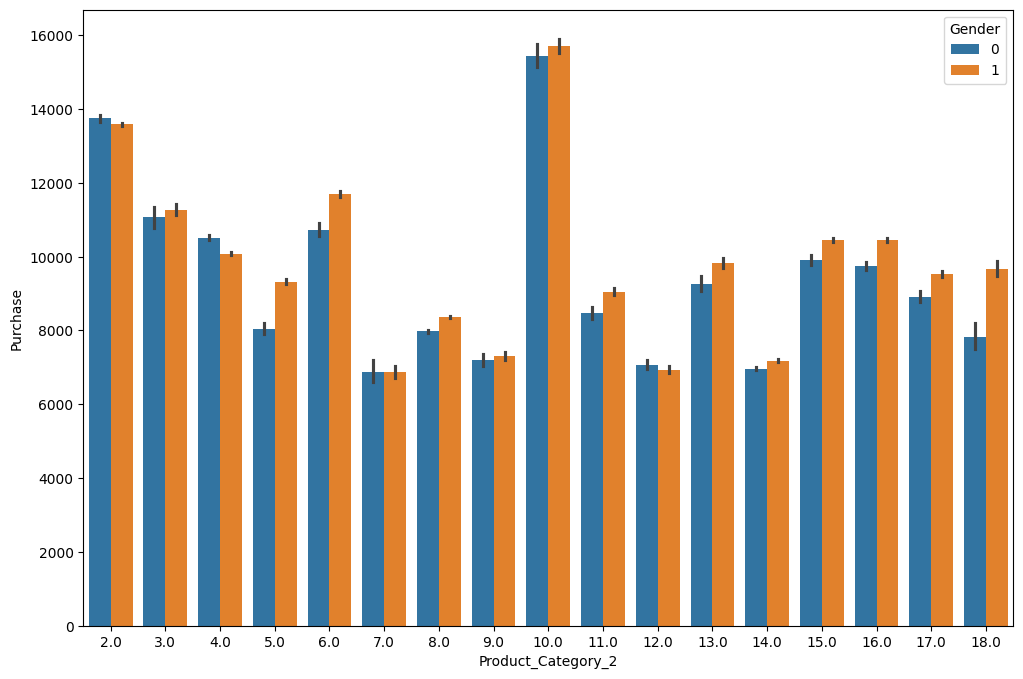

In [303]:
# Visualize the Product_Category_2 vs Purchase
plt.figure(figsize=(12, 8))
sns.barplot(x='Product_Category_2', y='Purchase', data=df,  hue='Gender')

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

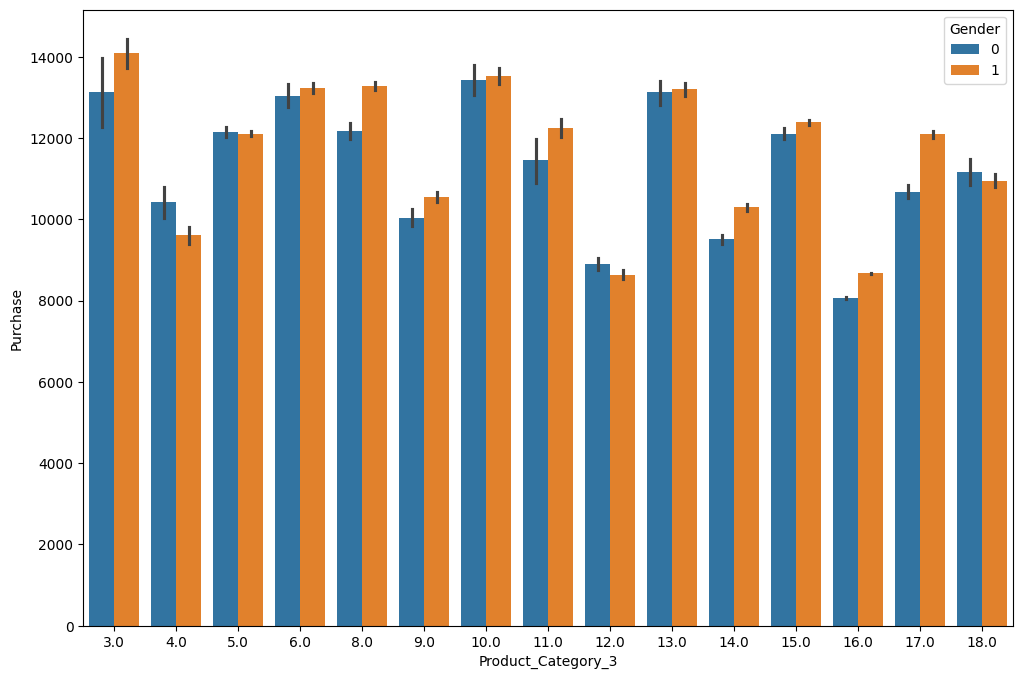

In [304]:
# Visualize the Product_Category_3 vs Purchase
plt.figure(figsize=(12, 8))
sns.barplot(x='Product_Category_3', y='Purchase', data=df,  hue='Gender')

In [305]:
# Filter out the test and train data
# Test data has null values in Purchase column
df_test = df[df['Purchase'].isnull()]
df_train = df[df['Purchase'].notnull()]

In [306]:
print(df_train.shape, df_test.shape)

(550068, 11) (233599, 11)


In [307]:
df_train.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [308]:
df_test.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
550068,1,5,7,2,1,1,11.0,16.0,NaN,1,0
550069,1,3,17,0,0,3,5.0,16.0,NaN,0,1
550070,0,4,1,4,1,5,14.0,16.0,NaN,1,0
550071,0,4,1,4,1,4,9.0,16.0,NaN,1,0
550072,0,3,1,1,0,4,5.0,12.0,NaN,0,1


In [309]:
# Train Test split
from sklearn.model_selection import train_test_split
X = df_train.drop(['Purchase'], axis=1)
y = df_train['Purchase']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [310]:
X_train.shape, X_test.shape

((440054, 10), (110014, 10))

In [311]:
y_train.shape, y_test.shape

((440054,), (110014,))

In [312]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape, X_test.shape

((440054, 10), (110014, 10))